Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\39346\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


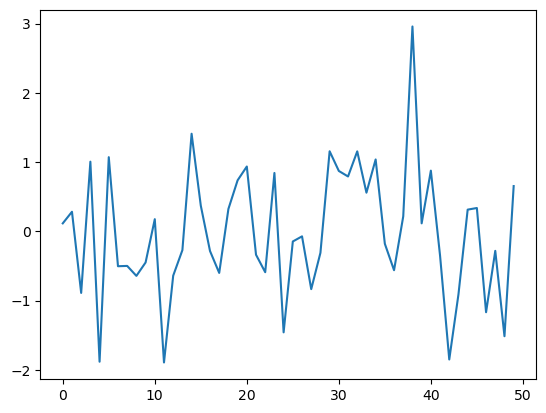

In [51]:
# This small project will use the Amazon Fine Food Reviews DataSet:
# https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews?resource=download

!pip install torch
!pip install transformers

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import nltk
nltk.download('punkt')

plt.style.use('default')  
data = np.random.randn(50)
plt.plot(data)
plt.show()




In [53]:
df = pd.read_csv('Reviews.csv')

df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [54]:
# for the sake of this project the text and score are the most important variables

In [55]:
print(df.shape)

(568454, 10)


In [56]:
# This dataset is quite large... hence we are going to use only the first thousand rows

df = df.head(1000)
print(df.shape)

(1000, 10)


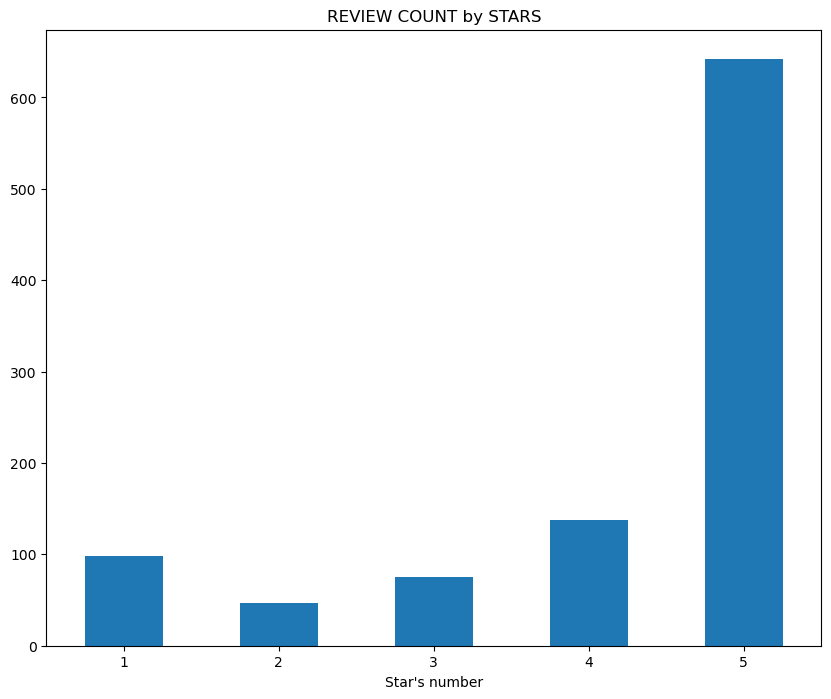

In [57]:
# we'll now move to some Data exploration keeping a focus on the score aka stars

ax=df['Score'].value_counts().sort_index() \
                .plot(kind='bar',
                 title="REVIEW COUNT by STARS",
                 figsize=(10,8))
                
ax.set_xlabel("Star's number")
plt.xticks(rotation=0)
plt.show()

In [58]:
# the overall view show us a bias towards 5 stars reviews

In [59]:
# dipping our toes in NLTK

example = df['Text'][500]
print(example)

I bought these for the office and no one can put them down. I'm ordering more today and it has only been 2 weeks. Didn't have to shop for them either, Amazon brought it to my door!


In [60]:
#seems like a good review, let's see how NLTK can help us with this

import nltk
nltk.data.path.clear()
nltk.data.path.append(r'C:\Users\39346\AppData\Roaming\nltk_data')
 
# NLTK has other plans running "nltk.download()" and downloading all packages see if it resolve the lookup error issue with Jupiter Notebook
# Restarting the kernel dind't work, so I had to download the packages manually

# Restart Kernel and run the code again

# If it still doesn't work reboot the OS


In [61]:
nltk.word_tokenize(example)

['I',
 'bought',
 'these',
 'for',
 'the',
 'office',
 'and',
 'no',
 'one',
 'can',
 'put',
 'them',
 'down',
 '.',
 'I',
 "'m",
 'ordering',
 'more',
 'today',
 'and',
 'it',
 'has',
 'only',
 'been',
 '2',
 'weeks',
 '.',
 'Did',
 "n't",
 'have',
 'to',
 'shop',
 'for',
 'them',
 'either',
 ',',
 'Amazon',
 'brought',
 'it',
 'to',
 'my',
 'door',
 '!']

In [62]:
# Tokeinzing is the process of breaking down a text into smaller components,

tokens = nltk.word_tokenize(example)

# NLTK can attribute a part of speech to each token, this is called POS tagging

nltk.pos_tag(tokens)


[('I', 'PRP'),
 ('bought', 'VBD'),
 ('these', 'DT'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('office', 'NN'),
 ('and', 'CC'),
 ('no', 'DT'),
 ('one', 'NN'),
 ('can', 'MD'),
 ('put', 'VB'),
 ('them', 'PRP'),
 ('down', 'RP'),
 ('.', '.'),
 ('I', 'PRP'),
 ("'m", 'VBP'),
 ('ordering', 'VBG'),
 ('more', 'JJR'),
 ('today', 'NN'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('has', 'VBZ'),
 ('only', 'RB'),
 ('been', 'VBN'),
 ('2', 'CD'),
 ('weeks', 'NNS'),
 ('.', '.'),
 ('Did', 'VBP'),
 ("n't", 'RB'),
 ('have', 'VB'),
 ('to', 'TO'),
 ('shop', 'VB'),
 ('for', 'IN'),
 ('them', 'PRP'),
 ('either', 'DT'),
 (',', ','),
 ('Amazon', 'NNP'),
 ('brought', 'VBD'),
 ('it', 'PRP'),
 ('to', 'TO'),
 ('my', 'PRP$'),
 ('door', 'NN'),
 ('!', '.')]

In [63]:
# Next we'll get into VADER, a tool capable of giving us a sentiment score
#  for each of the previously defined tokens (it can be Positive, Negative or Neutral)

from nltk.sentiment import SentimentIntensityAnalyzer

from tqdm.notebook import tqdm   ## tqdm is a library that allows us to create progress bars in Python

sia = SentimentIntensityAnalyzer()

In [64]:
sia.polarity_scores('I absolutely adore when I get scammed by a company, it makes me feel so good!')

{'neg': 0.0, 'neu': 0.581, 'pos': 0.419, 'compound': 0.8371}

In [65]:
# As you've just witnessed, the VADER tool is capable of giving us a sentiment score for each token 
# Yet it's not capable of deciphering the context of the sentence, nor the relationship between the words.
# Hence the sentiment score is not very accurate in this case. 
# Vader gives us a score between -1 and 1, where -1 is negative, 0 is neutral and 1 is positive.

In [66]:
print(example)

I bought these for the office and no one can put them down. I'm ordering more today and it has only been 2 weeks. Didn't have to shop for them either, Amazon brought it to my door!


In [67]:
sia.polarity_scores(example)
# (Not the best example)

{'neg': 0.067, 'neu': 0.887, 'pos': 0.046, 'compound': -0.2003}

In [68]:
# Now we want to run Vader on our dataset "Text" Column and grab the polarity scores 
# for each review in the dataset (1000 rows)

# We can achieve this with a loop

res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):

    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)


  0%|          | 0/1000 [00:00<?, ?it/s]

In [69]:
vaders = pd.DataFrame(res).T # Transposing the DataFrame to have the Id as index and the scores as columns

vaders = vaders.reset_index().rename(columns={'index': 'Id'}) # Adding Id to combine it with our DF

vaders = vaders.merge(df, how='left') 


In [70]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


C:\Users\39346\AppData\Local\Temp\ipykernel_8824\151320396.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Score', y='compound', data=vaders, palette='coolwarm')


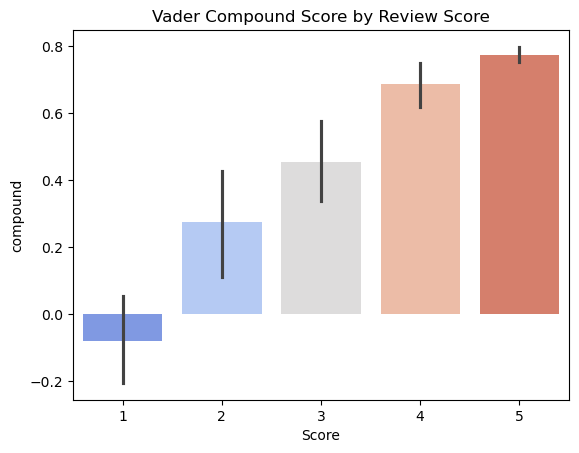

In [71]:
# We are now going to use sns to ccreate a bar plot to showcase the relation between 
# score and the vader compound score

ax = sns.barplot(x='Score', y='compound', data=vaders, palette='coolwarm')

ax.set_title('Vader Compound Score by Review Score')
plt.show()

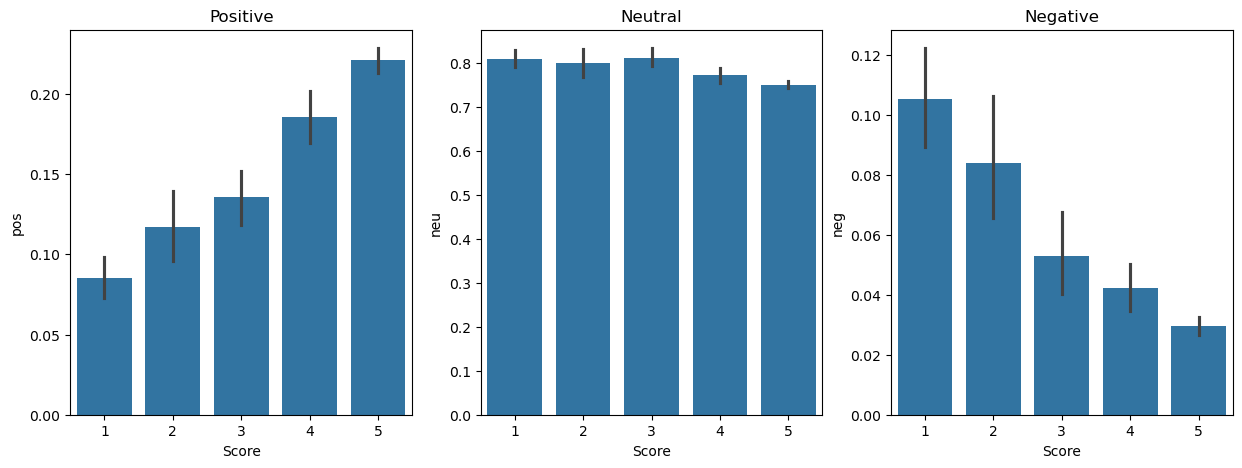

In [72]:
# We are now going to crete a graph for each compound score related to the review score

fig,axs = plt.subplots(1,3, figsize=(15,5))

sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive') 
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.show()

In [73]:


#setting up the enviroment may be more complicated than expected,

In [74]:
# Following the same line of thought, as before, 
# context is fundamental to understand the sentiment of a review
# Hence getly offered by HuggingFace, we are going to use Transformers, 
# a library that allows us to use pre-trained models for NLP tasks.
# The one we are going to use is called "distilbert-base-uncased-finetuned-sst-2-english"
# trained on twitter data, 

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax



In [75]:
import torch
print(torch.__version__)

#had to restart the kernel at every library installation,


2.7.1+cpu


In [76]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [77]:
# Just for comparsion here's our previous example with vader
print(example)
sia.polarity_scores(example)

I bought these for the office and no one can put them down. I'm ordering more today and it has only been 2 weeks. Didn't have to shop for them either, Amazon brought it to my door!


{'neg': 0.067, 'neu': 0.887, 'pos': 0.046, 'compound': -0.2003}

In [78]:
# Now let's see how the transformers model performs on the same example
# First we need to encode the text using the tokenizer

encode_text = tokenizer(example, return_tensors='pt')
output = model(**encode_text)              # output is a tensor that contains the scores for each sentiment
scores = output[0][0].detach().numpy()     # scores is a numpy array that contains the scores for each sentiment
scores = softmax(scores)                   # We apply the softmax function to get the probabilities
scores_dict = {                            # scores_dict is a dictionary that contains the scores for each sentiment
    'roberta_negative': scores[0], 
    'roberta_neutral': scores[1],
    'roberta_positive': scores[2]
}
print(scores_dict)



{'roberta_negative': 0.007319375, 'roberta_neutral': 0.051132575, 'roberta_positive': 0.941548}


In [79]:
# As you can see Roberta is decrypting a sophisticated review context 
# that VADER mistakes for a negative one,
# and giving us a more accurate sentiment score which is positive in this case.

In [80]:
# we'll now run the same process on our dataset,

def polarity_scores_roberta(example):
    encode_text = tokenizer(example, return_tensors='pt')
    output = model(**encode_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_negative': scores[0],
        'roberta_neutral': scores[1],
        'roberta_positive': scores[2]
    }
    return scores_dict

In [81]:
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):

    try:  
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)

        roberta_result = polarity_scores_roberta(text) #dictionary with the scores from Roberta
        both = {**vader_result, **roberta_result}  # Merging the two dictionaries
        res[myid] = both # Just to test the function, remove this line to run on the whole dataset

    except RuntimeError:
         print(f'Broke for id {myid}')
    

  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863


In [82]:
indices = [83, 187, 529, 540, 746, 863] # Here are the reviews that broke the loop,
for idx in indices:
    print(f"Index {idx}:")
    print(df['Text'][idx])
    print("-" * 80)

Index 83:
While my dogs like all of the flavors that we have tried of this dog food, for some reason their itching increased when I tried the lamb and rice. I have some very itchy dogs and am giving them a limited ingredient dog food to try to help. The duck and sweet potato cut down on the itching significantly, but when we tried lamb and rice they started itching more once again. I like Natural Balance for the quality ingredients.
--------------------------------------------------------------------------------
Index 187:
My Scotties were full of hot spots and when I used this within a week all the hot spots were gone. The smell is kinda strong, but not bad. It's tolerablel.
--------------------------------------------------------------------------------
Index 529:
Someone brought these to a party we had last month and I didn't put them out because the buffet was full and didn't think anyone would like saltless potato chips.  Last week we had some friends over and these were all I had

In [83]:
results_df = pd.DataFrame(res).T 
results_df = results_df.reset_index().rename(columns={'index': 'Id'}) 
results_df = results_df.merge(df, how='left') 

results_df.head()


,Id,neg,neu,pos,compound,roberta_negative,roberta_neutral,roberta_positive,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [84]:
results_df.columns


Index(['Id', 'neg', 'neu', 'pos', 'compound', 'roberta_negative',
       'roberta_neutral', 'roberta_positive', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

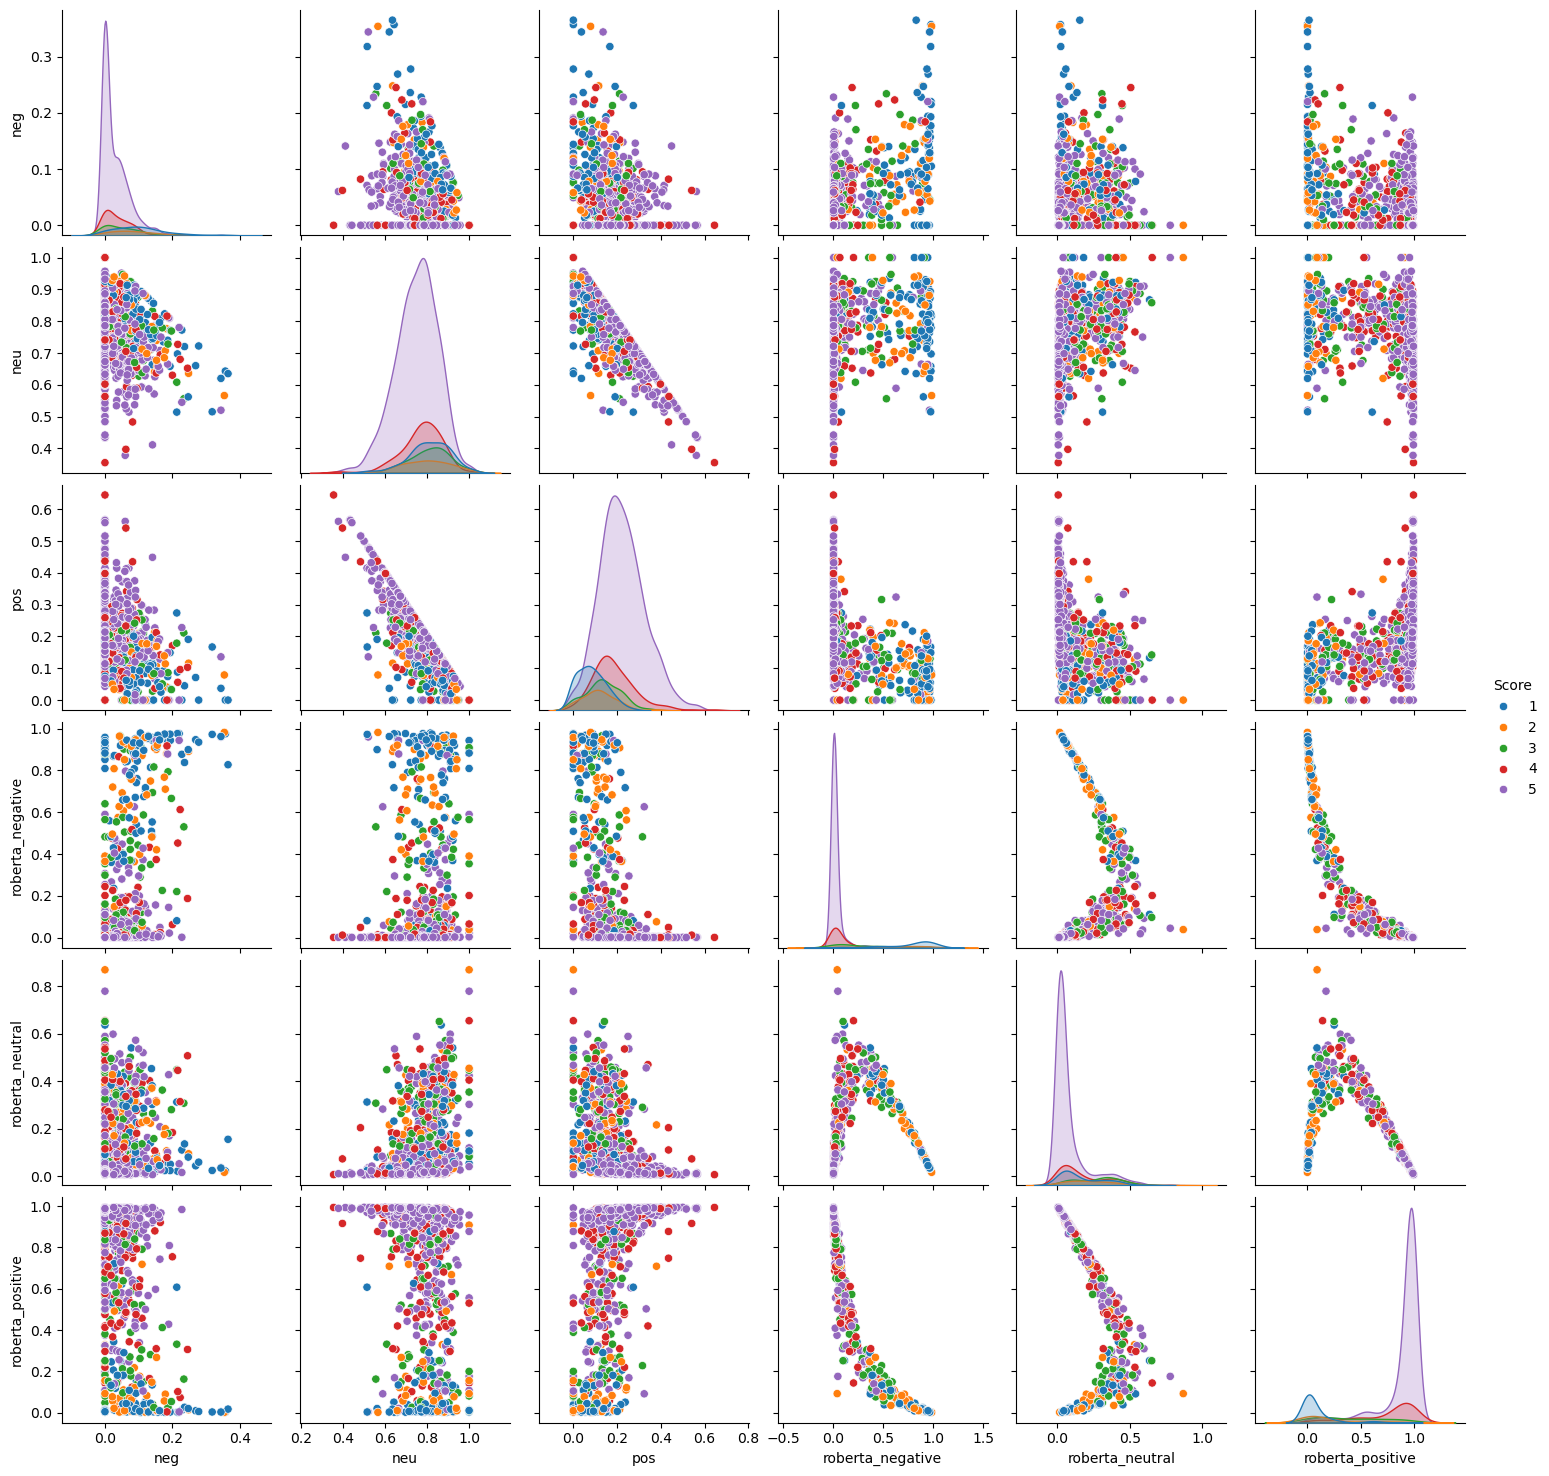

In [ ]:
# let's compare the results of VADER and Roberta

sns.pairplot(data=results_df,
             vars = ['neg', 'neu', 'pos', 'roberta_negative',
       'roberta_neutral', 'roberta_positive'],
        
        hue='Score',
        palette='tab10',
       )

In [ ]:
# Looking at the pairplot, we can see that the five-star reviews (shown in purple) 
# are clearly separated, especially by the Roberta model's positive scores.
# The Roberta model tends to be much more confident in its predictions, 
# strongly distinguishing between positive, neutral, and negative sentiments.
# In contrast, the VADER model's scores are more clustered and less confident, 
# with less separation between sentiment categories.
# This highlights how transformer-based models like Roberta 
# can better capture the sentiment extremes, especially for highly positive (five-star)
# and highly negative (one-star) reviews.

In [96]:
# Let's review some examples

results_df.query('Score == 1') \
    .sort_values('pos', ascending=False).values[0]

array([325, 0.213, 0.514, 0.274, 0.3185, 0.08101801574230194,
       0.31180256605148315, 0.6071794033050537, 'B000JEHAHS',
       'A2CU16YU1KEOUY', 'Hurricane Ridge "Chris"', 5, 19, 1, 1168300800,
       'Never Arrived',
       'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'],
      dtype=object)

In [97]:
# Vader didn't seem to understand the context of this review,
#Let's Check with Roberta
results_df.query('Score == 1') \
    .sort_values('roberta_positive', ascending=False).values[0]

array([948, 0.0, 0.814, 0.186, 0.9195, 0.033002156764268875,
       0.09062008559703827, 0.8763777613639832, 'B000ER6YO0',
       'A20DF2DTZYI8TQ', 'H Harkins', 0, 2, 1, 1302048000,
       'moms (and dads) beware of plastic in the food',
       "I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."],
      dtype=object)

In [ ]:
# ... Roberta let us down too :(